In [16]:
%reload_ext autoreload
%autoreload 2
%matplotlib inline
from sklearn.externals import joblib
import matplotlib.pyplot as plt
import numpy as np
import cv2
import sys
import selectivesearch
import matplotlib.patches as mpatches
from skimage.filters import gaussian
from skimage.util import img_as_float
import skimage
import scipy

sys.path.append(r"D:\Projects\LEGO Vision\Helpers")
import helpers

In [9]:
img = r"D:\LEGO Vision Datasets\Detection\Natural Data_output\positive\IMG_20181105_092359.jpg"
# img = helpers.image_resize(cv2.cvtColor(cv2.imread(img), cv2.COLOR_BGR2RGB), width=1024)

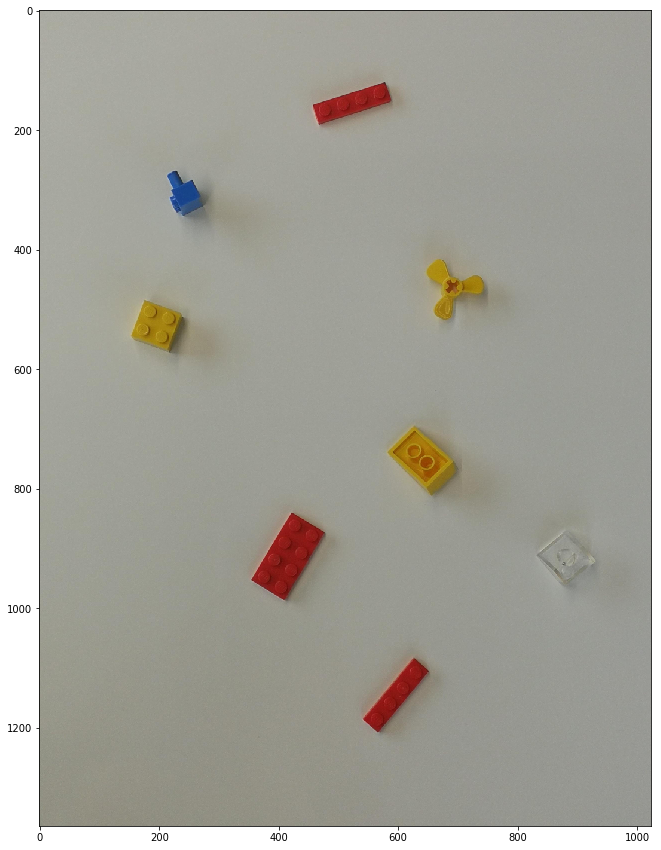

In [3]:
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(15,15))
ax.imshow(img)
plt.show()

In [7]:
!pip install opencv-contrib-python --user

  Using cached https://files.pythonhosted.org/packages/c8/94/1e4d01518a87c7de4591892d48ac403e721e13504a819cc358f93409d94a/opencv_contrib_python-3.4.3.18-cp36-cp36m-win_amd64.whl


Could not install packages due to an EnvironmentError: [WinError 5] Access is denied: 'C:\\Users\\Thijs\\AppData\\Roaming\\Python\\Python36\\site-packages\\cv2\\cv2.cp36-win_amd64.pyd'
Check the permissions.



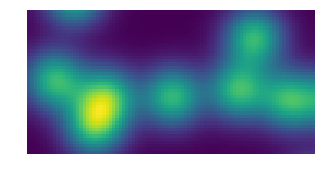

In [31]:
import numpy as np
from scipy import ndimage
import matplotlib.pyplot as plt

np.random.seed(1)
n = 10
l = 256
im = np.zeros((l, l))
points = l*np.random.random((2, n**2))
im[(points[0]).astype(np.int), (points[1]).astype(np.int)] = 1
im = ndimage.gaussian_filter(im, sigma=l/(4.*n))

mask = im > im.mean()

label_im, nb_labels = ndimage.label(mask)

# Find the largest connected component
sizes = ndimage.sum(mask, label_im, range(nb_labels + 1))
mask_size = sizes < 1000
remove_pixel = mask_size[label_im]
label_im[remove_pixel] = 0
labels = np.unique(label_im)
label_im = np.searchsorted(labels, label_im)

# Now that we have only one connected component, extract it's bounding box
slice_x, slice_y = ndimage.find_objects(label_im==4)[0]
roi = im[slice_x, slice_y]

plt.figure(figsize=(4, 2))
plt.axes([0, 0, 1, 1])
plt.imshow(roi)
plt.axis('off')

plt.show()

[[ 8  7  8 ... 34 32 32]
 [ 9  7  7 ... 32 33 32]
 [ 8  5  8 ... 33 33 33]
 ...
 [16 15 15 ... 32 32 32]
 [16 15 17 ... 32 33 31]
 [14 14 15 ... 30 31 33]]


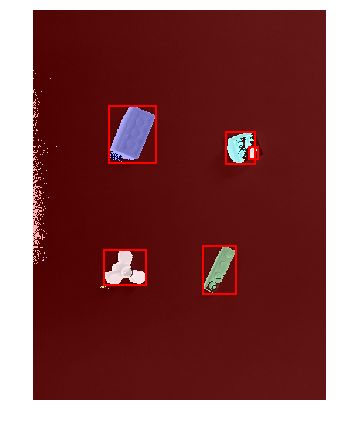

In [64]:
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches

from skimage import data
from skimage.filters import threshold_otsu
from skimage.segmentation import clear_border
from skimage.measure import label, regionprops
from skimage.morphology import closing, square
from skimage.color import label2rgb


image = data.coins()[50:-50, 50:-50]
image = helpers.image_resize(cv2.imread(r"D:\LEGO Vision Datasets\Detection\Natural Data_output\positive\IMG_20181031_112940.jpg", 0), width=500) - 150
# apply threshold

print(image)
thresh = threshold_otsu(image)
bw = closing(image > thresh, square(3))

# remove artifacts connected to image border
cleared = clear_border(bw)

# label image regions
label_image = label(cleared)
image_label_overlay = label2rgb(label_image, image=image)

fig, ax = plt.subplots(figsize=(10, 6))
ax.imshow(image_label_overlay)

for region in regionprops(label_image):
    # take regions with large enough areas
    if region.area >= 100:
        # draw rectangle around segmented coins
        minr, minc, maxr, maxc = region.bbox
        rect = mpatches.Rectangle((minc, minr), maxc - minc, maxr - minr,
                                  fill=False, edgecolor='red', linewidth=2)
        ax.add_patch(rect)

ax.set_axis_off()
plt.tight_layout()
plt.show()

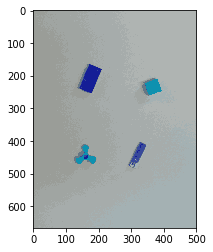

In [80]:
image = helpers.image_resize(cv2.imread(r"D:\LEGO Vision Datasets\Detection\Natural Data_output\positive\IMG_20181031_112940.jpg"), width=500)
plt.imshow(helpers.quantize(image/255., n_colors=9))